<a href="https://colab.research.google.com/github/fcresci/Colab/blob/main/Predizione_andamento_titolo_con_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
data = yf.download("GOOGL" , start = "2019-01-01" , interval = '1d')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02 00:00:00-05:00,51.360001,53.039501,51.264000,52.734001,52.734001,31868000
2019-01-03 00:00:00-05:00,52.533501,53.313000,51.118500,51.273499,51.273499,41960000
2019-01-04 00:00:00-05:00,52.127998,54.000000,51.842999,53.903500,53.903500,46022000
2019-01-07 00:00:00-05:00,54.048500,54.134998,53.132000,53.796001,53.796001,47446000
2019-01-08 00:00:00-05:00,54.299999,54.667500,53.417500,54.268501,54.268501,35414000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 948 entries, 2019-01-02 00:00:00-05:00 to 2022-10-05 00:00:00-04:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       948 non-null    float64
 1   High       948 non-null    float64
 2   Low        948 non-null    float64
 3   Close      948 non-null    float64
 4   Adj Close  948 non-null    float64
 5   Volume     948 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 51.8 KB


In [7]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data.isnull().sum().sum()

0

In [8]:
data.duplicated().any()

False

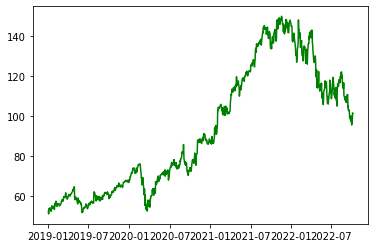

In [9]:
plt.plot(data.index, data['Close'], color='green', label='Close')
plt.show()

In [10]:
dataV1 = data.iloc[:,3:4]
dataV1 = dataV1.values